# Generating animals with WGAN-GP based on AFD dataset
Here the Wasserstein GAN with gradient penalty was tested for generating new animal faces on AFD dataset.

This is an extension to DCGAN that improves the stability of the network during training and provides a loss function that correlates more with actual quality of new generated images.

Here, the discirminator serves as critic that scores the realness or fakeness of a given image and is trained more (usually 5 times) than generator. It incorporates Wassersetin loss into discriminator.

The WGAN-GP method is improved model of plain WGAN ensuring smooth training. Instead of clipping the weights, the authors proposed a "gradient penalty" by adding a loss term that keeps the L2 norm of the discriminator gradients close to 1. 

Link to the paper: https://arxiv.org/abs/1704.00028

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Data loading

In [2]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [4]:
MAIN_DIR = '/content/gdrive/MyDrive/ganimals/'
OUTPUT_DIR = '/content/gdrive/MyDrive/ganimals/wgan_afd/'

In [5]:
def load_data(path_to_npz):
  '''
  Load image data saved in .npz format and return as np array

  Args:
    path
  '''
  data = np.load(path_to_npz)
  animals = data['arr_0']
  print('Loaded: ', animals.shape)

  return animals

def preprocess_images(animals):
  '''
  Processing images for normalization and shuffling
  Args:
    animals - np.array, image data
    targets - np.array, classes of images in animals array
  '''
  animals = (animals.astype('float32') - 127.5) / 127.5  # Normalize the images to [-1, 1] - this is needed for gan generator
  np.random.shuffle(animals) 

  return animals

In [6]:
afd_animals = load_data(MAIN_DIR + 'afd_animals.npz')
afd_animals = preprocess_images(afd_animals)

Loaded:  (10576, 80, 80, 3)


In [7]:
# TESTS DATA LOADING

def test_data_laoding(images, expected_size):

  assert images.shape[1:] == (80, 80, 3) # test img shape
  assert images.shape[0] > expected_size # test size approx

def test_normalization(images):
  assert (images <= 1).all() & (images >= -1).all(), 'Data  should be normalized and range from -1 to 1'

test_data_laoding(afd_animals, 10000)
test_normalization(afd_animals)

# WGAN-GP

In [7]:
from wgan_gp import WGAN, GANMonitor

In [12]:
batch_size = 256
num_channels = 3
image_size = 80
latent_dim = 100

In [9]:
# Instantiate the customer `GANMonitor` Keras callback.
cbk = GANMonitor(epoch_summarize=10, latent_dim=latent_dim)

# Get the wgan model
wgan = WGAN(d_steps=5, latent_dim=latent_dim)

# Compile the wgan model
wgan.compile()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 40, 64)        4864      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 40, 40, 64)        0         
                                                                 
 dropout (Dropout)           (None, 40, 40, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 128)       204928    
                                                                 
 layer_normalization (LayerN  (None, 20, 20, 128)      256       
 ormalization)                                                   
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 20, 20, 128)       0         
                                                     

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# to save intermediate models and images to drive
os.chdir(OUTPUT_DIR)

In [ ]:
# Start training
wgan.fit(afd_animals, batch_size=256, epochs=200, callbacks=[cbk])

Epoch 1/200
42/42 [==============================] - 57s 566ms/step - d_loss: -18.2618 - g_loss: 13.2468
Epoch 2/200
42/42 [==============================] - 23s 552ms/step - d_loss: -13.0172 - g_loss: 20.0009
Epoch 3/200
42/42 [==============================] - 23s 552ms/step - d_loss: -14.7770 - g_loss: 33.4428
Epoch 4/200
42/42 [==============================] - 23s 551ms/step - d_loss: -11.0491 - g_loss: 30.4327
Epoch 5/200
42/42 [==============================] - 23s 553ms/step - d_loss: -10.7634 - g_loss: 8.9994
Epoch 6/200
42/42 [==============================] - 23s 552ms/step - d_loss: -8.8988 - g_loss: 12.0264
Epoch 7/200
42/42 [==============================] - 23s 552ms/step - d_loss: -9.4314 - g_loss: -2.0810
Epoch 8/200
42/42 [==============================] - 23s 552ms/step - d_loss: -8.7963 - g_loss: 6.7682
Epoch 9/200
42/42 [==============================] - 23s 552ms/step - d_loss: -8.2966 - g_loss: -4.4483
Epoch 10/200
42/42 [==============================] - ETA: 0s

42/42 [==============================] - 25s 605ms/step - d_loss: -7.3911 - g_loss: 0.0800
Epoch 11/200
42/42 [==============================] - 23s 552ms/step - d_loss: -8.0235 - g_loss: 14.0556
Epoch 12/200
42/42 [==============================] - 23s 552ms/step - d_loss: -7.6985 - g_loss: 19.2707
Epoch 13/200
42/42 [==============================] - 23s 552ms/step - d_loss: -6.1859 - g_loss: 19.1995
Epoch 14/200
42/42 [==============================] - 23s 552ms/step - d_loss: -7.7512 - g_loss: 13.8533
Epoch 15/200
42/42 [==============================] - 23s 552ms/step - d_loss: -6.9675 - g_loss: 21.6521
Epoch 16/200
42/42 [==============================] - 23s 552ms/step - d_loss: -6.8435 - g_loss: 14.1408
Epoch 17/200
42/42 [==============================] - 23s 552ms/step - d_loss: -6.5568 - g_loss: 26.2379
Epoch 18/200
42/42 [==============================] - 23s 552ms/step - d_loss: -6.3632 - g_loss: 14.0751
Epoch 19/200
42/42 [==============================] - 23s 552ms/step 

42/42 [==============================] - 25s 601ms/step - d_loss: -5.5690 - g_loss: 21.1279
Epoch 21/200
42/42 [==============================] - 23s 553ms/step - d_loss: -5.7084 - g_loss: 21.3304
Epoch 22/200
42/42 [==============================] - 23s 552ms/step - d_loss: -5.6565 - g_loss: 12.8451
Epoch 23/200
42/42 [==============================] - 23s 552ms/step - d_loss: -5.5606 - g_loss: 23.5579
Epoch 24/200
42/42 [==============================] - 23s 552ms/step - d_loss: -4.9229 - g_loss: 27.4679
Epoch 25/200
42/42 [==============================] - 23s 552ms/step - d_loss: -5.4392 - g_loss: 26.3156
Epoch 26/200
42/42 [==============================] - 23s 552ms/step - d_loss: -5.5189 - g_loss: 15.8014
Epoch 27/200
42/42 [==============================] - 23s 553ms/step - d_loss: -5.6238 - g_loss: 2.9915
Epoch 28/200
42/42 [==============================] - 23s 552ms/step - d_loss: -4.6013 - g_loss: 13.9769
Epoch 29/200
42/42 [==============================] - 23s 552ms/step 

42/42 [==============================] - 25s 606ms/step - d_loss: -5.2144 - g_loss: 15.3269
Epoch 31/200
42/42 [==============================] - 23s 552ms/step - d_loss: -4.9398 - g_loss: 26.5458
Epoch 32/200
42/42 [==============================] - 23s 552ms/step - d_loss: -4.5689 - g_loss: 28.0490
Epoch 33/200
42/42 [==============================] - 23s 552ms/step - d_loss: -5.0385 - g_loss: 24.8681
Epoch 34/200
42/42 [==============================] - 23s 552ms/step - d_loss: -4.8362 - g_loss: 27.0218
Epoch 35/200
42/42 [==============================] - 23s 553ms/step - d_loss: -4.6362 - g_loss: 26.0753
Epoch 36/200
42/42 [==============================] - 23s 552ms/step - d_loss: -4.7405 - g_loss: 44.6849
Epoch 37/200
42/42 [==============================] - 23s 552ms/step - d_loss: -4.6989 - g_loss: 16.5704
Epoch 38/200
42/42 [==============================] - 23s 552ms/step - d_loss: -4.5773 - g_loss: 21.3389
Epoch 39/200
42/42 [==============================] - 23s 552ms/step

42/42 [==============================] - 25s 594ms/step - d_loss: -4.4884 - g_loss: 28.3675
Epoch 41/200
42/42 [==============================] - 23s 552ms/step - d_loss: -4.2557 - g_loss: 23.8001
Epoch 42/200
42/42 [==============================] - 23s 552ms/step - d_loss: -4.9136 - g_loss: 19.3191
Epoch 43/200
42/42 [==============================] - 23s 552ms/step - d_loss: -4.0202 - g_loss: 27.5936
Epoch 44/200
42/42 [==============================] - 23s 552ms/step - d_loss: -4.4865 - g_loss: 7.6349
Epoch 45/200
42/42 [==============================] - 23s 552ms/step - d_loss: -4.3594 - g_loss: 16.8240
Epoch 46/200
42/42 [==============================] - 23s 552ms/step - d_loss: -4.4334 - g_loss: 9.9133
Epoch 47/200
42/42 [==============================] - 23s 552ms/step - d_loss: -4.6570 - g_loss: 27.9088
Epoch 48/200
42/42 [==============================] - 23s 552ms/step - d_loss: -4.1090 - g_loss: 13.6110
Epoch 49/200
42/42 [==============================] - 23s 552ms/step -

42/42 [==============================] - 25s 607ms/step - d_loss: -4.0026 - g_loss: 23.2094
Epoch 51/200
42/42 [==============================] - 23s 552ms/step - d_loss: -3.6184 - g_loss: 38.3260
Epoch 52/200
42/42 [==============================] - 23s 552ms/step - d_loss: -3.3632 - g_loss: 30.3008
Epoch 53/200
42/42 [==============================] - 23s 552ms/step - d_loss: -3.3887 - g_loss: 34.5608
Epoch 54/200
42/42 [==============================] - 23s 552ms/step - d_loss: -3.8277 - g_loss: 39.0988
Epoch 55/200
42/42 [==============================] - 23s 552ms/step - d_loss: -3.6532 - g_loss: 34.2959
Epoch 56/200
42/42 [==============================] - 23s 552ms/step - d_loss: -3.7138 - g_loss: 22.0420
Epoch 57/200
42/42 [==============================] - 23s 552ms/step - d_loss: -3.4103 - g_loss: 31.5280
Epoch 58/200
42/42 [==============================] - 23s 552ms/step - d_loss: -3.3703 - g_loss: 16.9042
Epoch 59/200
42/42 [==============================] - 23s 552ms/step

42/42 [==============================] - 25s 594ms/step - d_loss: -3.6002 - g_loss: 54.2342
Epoch 61/200
42/42 [==============================] - 23s 552ms/step - d_loss: -3.9392 - g_loss: 43.2487
Epoch 62/200
42/42 [==============================] - 23s 552ms/step - d_loss: -3.4921 - g_loss: 32.4136
Epoch 63/200
42/42 [==============================] - 23s 552ms/step - d_loss: -3.8564 - g_loss: 34.0119
Epoch 64/200
42/42 [==============================] - 23s 552ms/step - d_loss: -3.5332 - g_loss: 16.2806
Epoch 65/200
42/42 [==============================] - 23s 552ms/step - d_loss: -3.6628 - g_loss: 30.7790
Epoch 66/200
42/42 [==============================] - 23s 552ms/step - d_loss: -3.4697 - g_loss: 28.1881
Epoch 67/200
42/42 [==============================] - 23s 551ms/step - d_loss: -3.5684 - g_loss: 27.1584
Epoch 68/200
42/42 [==============================] - 23s 552ms/step - d_loss: -3.2372 - g_loss: 36.5742
Epoch 69/200
42/42 [==============================] - 23s 552ms/step

42/42 [==============================] - 26s 610ms/step - d_loss: -3.0453 - g_loss: 31.8354
Epoch 71/200
42/42 [==============================] - 23s 552ms/step - d_loss: -3.7123 - g_loss: 31.8684
Epoch 72/200
42/42 [==============================] - 23s 552ms/step - d_loss: -3.3227 - g_loss: 30.9913
Epoch 73/200
42/42 [==============================] - 23s 552ms/step - d_loss: -3.2666 - g_loss: 27.5223
Epoch 74/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.9708 - g_loss: 23.7379
Epoch 75/200
42/42 [==============================] - 23s 552ms/step - d_loss: -3.4978 - g_loss: 23.7125
Epoch 76/200
42/42 [==============================] - 23s 552ms/step - d_loss: -3.1241 - g_loss: 16.7212
Epoch 77/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.8815 - g_loss: 25.6154
Epoch 78/200
42/42 [==============================] - 23s 552ms/step - d_loss: -3.1621 - g_loss: 23.6089
Epoch 79/200
42/42 [==============================] - 23s 552ms/step

42/42 [==============================] - 25s 594ms/step - d_loss: -3.0656 - g_loss: 31.7406
Epoch 81/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.8913 - g_loss: 33.3980
Epoch 82/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.8494 - g_loss: 46.7102
Epoch 83/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.9967 - g_loss: 32.3825
Epoch 84/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.6335 - g_loss: 38.1753
Epoch 85/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.8140 - g_loss: 37.4175
Epoch 86/200
42/42 [==============================] - 23s 552ms/step - d_loss: -3.1735 - g_loss: 35.0331
Epoch 87/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.9324 - g_loss: 32.8037
Epoch 88/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.5341 - g_loss: 43.0841
Epoch 89/200
42/42 [==============================] - 23s 552ms/step

42/42 [==============================] - 26s 616ms/step - d_loss: -2.8045 - g_loss: 31.6268
Epoch 91/200
42/42 [==============================] - 23s 553ms/step - d_loss: -2.9559 - g_loss: 11.3787
Epoch 92/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.8073 - g_loss: 34.4187
Epoch 93/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.4469 - g_loss: 38.5556
Epoch 94/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.5756 - g_loss: 25.3296
Epoch 95/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.8252 - g_loss: 19.9149
Epoch 96/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.9492 - g_loss: 36.0608
Epoch 97/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.8435 - g_loss: 25.6292
Epoch 98/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.7740 - g_loss: 30.3712
Epoch 99/200
42/42 [==============================] - 23s 552ms/step

42/42 [==============================] - 25s 594ms/step - d_loss: -2.6774 - g_loss: 8.5444
Epoch 101/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.3298 - g_loss: 32.7990
Epoch 102/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.6817 - g_loss: 16.5737
Epoch 103/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.6440 - g_loss: 34.6746
Epoch 104/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.7459 - g_loss: 9.5558
Epoch 105/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.6543 - g_loss: 10.9819
Epoch 106/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.4993 - g_loss: 23.7002
Epoch 107/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.6149 - g_loss: 9.2557
Epoch 108/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.5064 - g_loss: 23.8681
Epoch 109/200
42/42 [==============================] - 23s 552m

42/42 [==============================] - 25s 594ms/step - d_loss: -2.3475 - g_loss: -0.8833
Epoch 111/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.6030 - g_loss: 16.2541
Epoch 112/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.5645 - g_loss: 13.7503
Epoch 113/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.3717 - g_loss: 12.1454
Epoch 114/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.6650 - g_loss: 26.8941
Epoch 115/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.5501 - g_loss: 6.0384
Epoch 116/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.7929 - g_loss: 8.8357
Epoch 117/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.4574 - g_loss: 13.2831
Epoch 118/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.7410 - g_loss: 8.9761
Epoch 119/200
42/42 [==============================] - 23s 552m

42/42 [==============================] - 25s 594ms/step - d_loss: -2.3955 - g_loss: 4.5561
Epoch 121/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.4463 - g_loss: -6.4358
Epoch 122/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.5544 - g_loss: 3.0601
Epoch 123/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.5528 - g_loss: 6.0940
Epoch 124/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.4401 - g_loss: 22.1868
Epoch 125/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.4606 - g_loss: 4.6273
Epoch 126/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.4883 - g_loss: 2.2261
Epoch 127/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.5757 - g_loss: 8.5426
Epoch 128/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.5616 - g_loss: 5.9480
Epoch 129/200
42/42 [==============================] - 23s 552ms/st

42/42 [==============================] - 26s 622ms/step - d_loss: -2.8315 - g_loss: -4.8389
Epoch 131/200
42/42 [==============================] - 23s 553ms/step - d_loss: -2.1195 - g_loss: -4.8338
Epoch 132/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.5608 - g_loss: 5.5188
Epoch 133/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.2777 - g_loss: -0.3043
Epoch 134/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.5758 - g_loss: -12.3393
Epoch 135/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.3157 - g_loss: 23.1855
Epoch 136/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.3075 - g_loss: 15.7839
Epoch 137/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.1778 - g_loss: -2.1384
Epoch 138/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.1250 - g_loss: 0.0526
Epoch 139/200
42/42 [==============================] - 23s 55

42/42 [==============================] - 25s 595ms/step - d_loss: -2.2906 - g_loss: -12.5081
Epoch 141/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.3973 - g_loss: -8.7063
Epoch 142/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.5796 - g_loss: -12.1013
Epoch 143/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.4144 - g_loss: -16.9863
Epoch 144/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.3140 - g_loss: -24.2134
Epoch 145/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.0108 - g_loss: 5.7417
Epoch 146/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.1299 - g_loss: -14.5453
Epoch 147/200
42/42 [==============================] - 23s 552ms/step - d_loss: -1.9352 - g_loss: -1.6659
Epoch 148/200
42/42 [==============================] - 23s 552ms/step - d_loss: -1.9783 - g_loss: -1.7781
Epoch 149/200
42/42 [==============================] - 2

42/42 [==============================] - 25s 595ms/step - d_loss: -2.4398 - g_loss: -3.0127
Epoch 151/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.0377 - g_loss: 15.2873
Epoch 152/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.3718 - g_loss: -10.7301
Epoch 153/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.3775 - g_loss: -6.6562
Epoch 154/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.6951 - g_loss: -21.3234
Epoch 155/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.1755 - g_loss: -0.9784
Epoch 156/200
42/42 [==============================] - 23s 552ms/step - d_loss: -1.8769 - g_loss: 20.9993
Epoch 157/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.4647 - g_loss: 1.4137
Epoch 158/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.2866 - g_loss: 10.7364
Epoch 159/200
42/42 [==============================] - 23s 

42/42 [==============================] - 25s 595ms/step - d_loss: -1.8718 - g_loss: -1.1754
Epoch 161/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.7809 - g_loss: 0.2224
Epoch 162/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.4523 - g_loss: 9.9325
Epoch 163/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.3925 - g_loss: 54.2750
Epoch 164/200
42/42 [==============================] - 23s 553ms/step - d_loss: -2.4025 - g_loss: 62.0201
Epoch 165/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.1136 - g_loss: 53.2560
Epoch 166/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.4312 - g_loss: 32.7087
Epoch 167/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.3167 - g_loss: 22.7023
Epoch 168/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.5126 - g_loss: 31.0534
Epoch 169/200
42/42 [==============================] - 23s 552

42/42 [==============================] - 26s 630ms/step - d_loss: -2.0436 - g_loss: 25.5358
Epoch 171/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.1956 - g_loss: 23.1381
Epoch 172/200
42/42 [==============================] - 23s 553ms/step - d_loss: -2.3439 - g_loss: 8.3688
Epoch 173/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.0093 - g_loss: 20.0863
Epoch 174/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.2382 - g_loss: 13.7650
Epoch 175/200
42/42 [==============================] - 23s 552ms/step - d_loss: -1.9971 - g_loss: 35.1226
Epoch 176/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.2201 - g_loss: 46.5851
Epoch 177/200
42/42 [==============================] - 23s 553ms/step - d_loss: -2.2118 - g_loss: 40.4435
Epoch 178/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.6238 - g_loss: 47.8996
Epoch 179/200
42/42 [==============================] - 23s 55

42/42 [==============================] - 25s 595ms/step - d_loss: -2.3177 - g_loss: 41.8154
Epoch 181/200
42/42 [==============================] - 23s 553ms/step - d_loss: -2.6654 - g_loss: 42.6184
Epoch 182/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.0707 - g_loss: 30.7298
Epoch 183/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.1809 - g_loss: 2.3022
Epoch 184/200
42/42 [==============================] - 23s 552ms/step - d_loss: -1.8564 - g_loss: -6.2329
Epoch 185/200
42/42 [==============================] - 23s 553ms/step - d_loss: -1.8185 - g_loss: 16.2210
Epoch 186/200
42/42 [==============================] - 23s 552ms/step - d_loss: -1.8336 - g_loss: 31.3293
Epoch 187/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.1548 - g_loss: 31.6469
Epoch 188/200
42/42 [==============================] - 23s 553ms/step - d_loss: -1.5195 - g_loss: 27.2174
Epoch 189/200
42/42 [==============================] - 23s 55

42/42 [==============================] - 25s 594ms/step - d_loss: -2.1395 - g_loss: 34.2818
Epoch 191/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.0591 - g_loss: 40.4931
Epoch 192/200
42/42 [==============================] - 23s 552ms/step - d_loss: -1.9891 - g_loss: 43.8678
Epoch 193/200
42/42 [==============================] - 23s 552ms/step - d_loss: -1.7375 - g_loss: 48.8375
Epoch 194/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.1209 - g_loss: 47.7126
Epoch 195/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.0378 - g_loss: 48.6795
Epoch 196/200
42/42 [==============================] - 23s 552ms/step - d_loss: -1.9770 - g_loss: 58.8061
Epoch 197/200
42/42 [==============================] - 23s 552ms/step - d_loss: -1.7529 - g_loss: 31.1167
Epoch 198/200
42/42 [==============================] - 23s 552ms/step - d_loss: -2.3381 - g_loss: 26.7141
Epoch 199/200
42/42 [==============================] - 23s 5

42/42 [==============================] - 25s 593ms/step - d_loss: -2.1624 - g_loss: 22.0957


# Evaluation


## Load model

In [8]:
import tensorflow as tf
from keras.models import load_model
import matplotlib.image as mpimg

In [9]:
generator_wgan = load_model(OUTPUT_DIR + 'generator_model2_200.h5')

In [13]:
# TEST GENERATOR OUTPUT

def test_ouput_size():
    shape = (1, latent_dim)
    image = tf.ones(shape)
    img_shape = (1, image_size, image_size, num_channels)
    generated_image = generator_wgan.predict(image)
    assert generated_image.shape == img_shape, 'Generator should produce output in the shape of training images'

def test_output_range():
    shape = (1, latent_dim)
    image = tf.ones(shape)
    generated_image = generator_wgan.predict(image)
    assert (generated_image <= 1).all() & (generated_image >= -1).all(), 'Generator should produce output normalized output values'

test_ouput_size()
test_output_range()

1/1 [==============================] - 0s 25ms/step


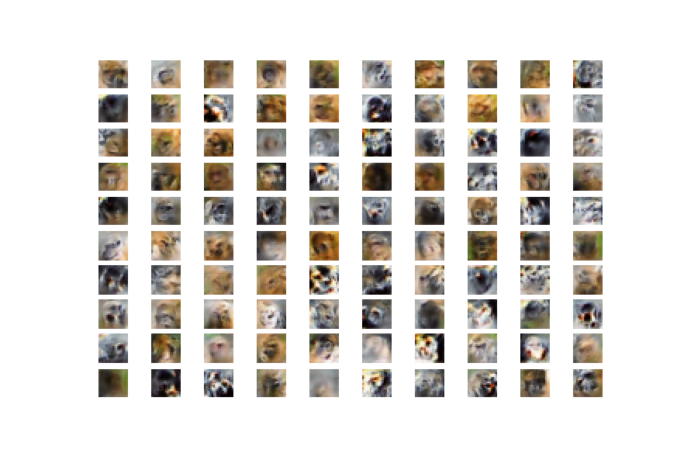

In [10]:
img = mpimg.imread(OUTPUT_DIR + 'generated_plot2_e200.png')

plt.figure(figsize=(12,12))
plt.imshow(img)
plt.axis('off')
plt.show()

## Check generation of new images

1/1 [==============================] - 0s 262ms/step


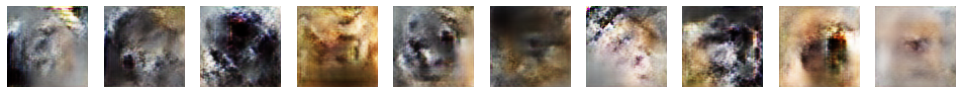

In [14]:
def generate_image(generator, n, latent_dim=latent_dim):
  # sample noise for the interpolation.
  interpolation_noise = tf.random.normal(shape=(n, latent_dim))
  fake_img = generator.predict(interpolation_noise)

  return fake_img

def plot_generated(fake_images, n):

  fake_images = (fake_images + 1)/2.0

  plt.figure(figsize=(17,17))
  for i in range(n):

    plt.subplot(1, n, 1 + i)
    plt.axis('off')
    plt.imshow(fake_images[i])
  
  plt.show()

# generate some individual examples
n = 10
img = generate_image(generator_wgan, n)
plot_generated(img, n)

# Exploring latent space

Interpolating between to latent points in latent space and plotting

In [17]:
# spherical linear interpolation (slerp)
def slerp(val, low, high):
	omega = np.arccos(np.clip(np.dot(low/np.linalg.norm(low), high/np.linalg.norm(high)), -1, 1))
	so = np.sin(omega)
	if so == 0:
		return (1.0-val) * low + val * high
		
	return np.sin((1.0-val)*omega) / so * low + np.sin(val*omega) / so * high

def interpolate_points(p1, p2, n_steps=10, if_slerp=True):
	# interpolate ratios between the points
  ratios = np.linspace(0, 1, num=n_steps)

  vectors = list()
  if if_slerp:
    vectors = [slerp(ratio, p1, p2) for ratio in ratios] # slerp interpolation
  else:
    vectors = [(1.0 - ratio) * p1 + ratio * p2 for ratio in ratios] # uniform interpolation between two points in latent space
    
  return np.asarray(vectors)


def display_interpolated(num_interpolation, n_steps=10, if_slerp=False):

  interpolation_noise = tf.random.normal(shape=(num_interpolation*2, latent_dim))

  for i in range(0, 2*num_interpolation, 2):
    interpolated = interpolate_points(interpolation_noise[i], interpolation_noise[i+1], n_steps, if_slerp)
    X = generator_wgan.predict(interpolated)
    plot_generated(X, n_steps)


In [16]:
# TEST INTERPOLATION
def test_interpolation():
  
  dummy_input_first = tf.random.normal(shape=(100,))
  dummy_input_second = tf.random.normal(shape=(100,))

  x = interpolate_points(dummy_input_first, dummy_input_second, n_steps=10, if_slerp=False)

  maxval = max(dummy_input_first.numpy().max(), dummy_input_second.numpy().max())
  minval = min(dummy_input_first.numpy().min(), dummy_input_second.numpy().min())

  assert x.shape == (10, 100)
  assert (x <= maxval).all() & (x >= minval).all()
  

test_interpolation()

1/1 [==============================] - 0s 15ms/step


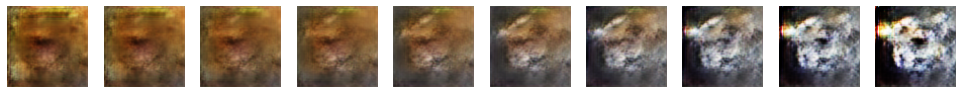

1/1 [==============================] - 0s 16ms/step


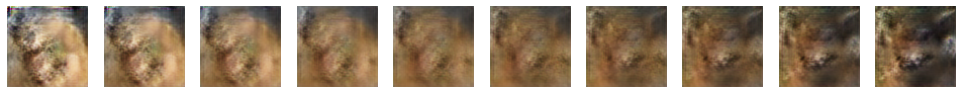

1/1 [==============================] - 0s 15ms/step


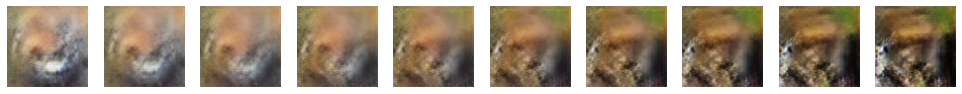

1/1 [==============================] - 0s 15ms/step


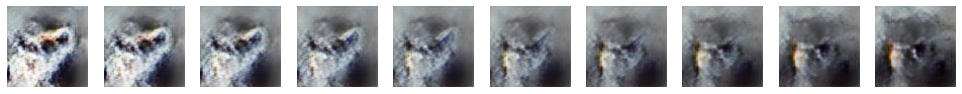

1/1 [==============================] - 0s 16ms/step


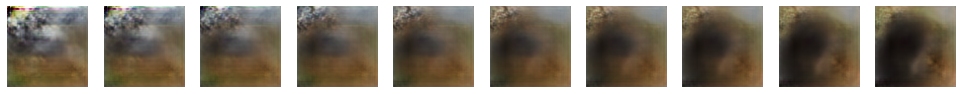

In [18]:
display_interpolated(num_interpolation=5, n_steps=10, if_slerp=False)

1/1 [==============================] - 0s 24ms/step


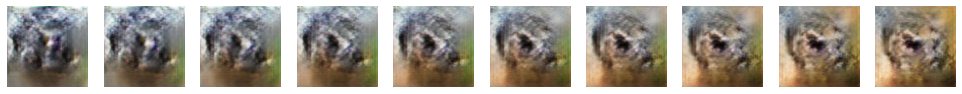

1/1 [==============================] - 0s 28ms/step


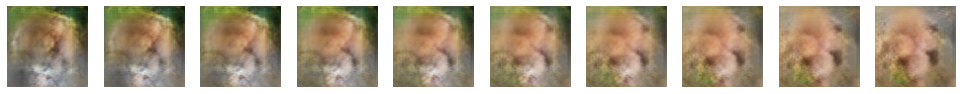

1/1 [==============================] - 0s 21ms/step


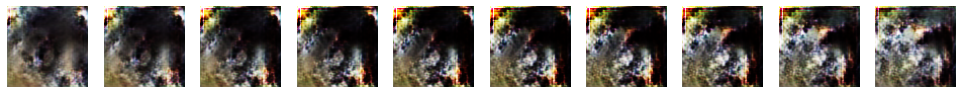

1/1 [==============================] - 0s 18ms/step


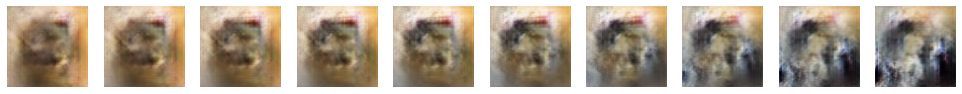

1/1 [==============================] - 0s 16ms/step


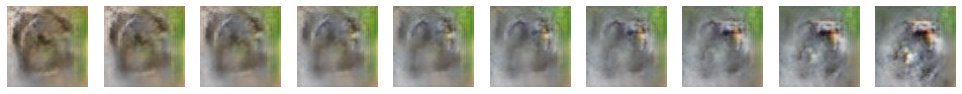

In [19]:
display_interpolated(num_interpolation=5, n_steps=10, if_slerp=True)

# Notes 

## Notes from training

1. Implemented GANs with the use of old tf - didnt work with weirdly implemented gradient penalty

2. Followed keras WGAN-GP tutorial - that worked, however, I put my own architecture of discriminator and generator (similar to the one used in DCGAN but with different number of neurons). CHanges
  - different discriminator and generator architecture
  - using RMSprop with 0.00005 as in original WGAN
  - code restructuring
  - model saving
3. Training was at first great then tricky. The more epochs it trained for the gradients kept exploading - discriminator loss goes almost exponentially down to large negative values
4. Tried with different number of training for discriminator and 
5. Changed optimizer to Adam as in keras tutorial - still exploading gradient and worse generated images, more pixelated like noise
6. Started reading WGAN-GP - its batch normalization that probably is faulty! Chaned that to LayerNormalization() as adviced somewhere on stackoverflow - that was a fix

## Notes on the result

The architecture of both models differs a bit in number of filters in convolutional layers, but WGAN-GP was trained for longer (200 epochs, DCGAN for 150 epochs). The observation from training was that it produced better images at the start - DCGAN first really creates just noise, WGAN produced some shapes with colors corresponding to training images. 

The genrated images in comparison to results obtained from baseline DCGAN tend to be noisy with less meaningful detailes, despite model being trained for longer. 

The overall shape most of the time does not resemble an animal, but rather is a blurry patch. Therefore, also higher level features like ears and eyes are rather hard to spot and there is no way to judge on the "hybridization" of the images.

